In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
def find_final_cm(logpath, numclass=10, src_class=6):

    with open(logpath, "r") as f:
        file_lines = [line.strip() for line in f.readlines()]

    mat_str = file_lines[-13:-3]
    mat_str[0] = mat_str[0][1:]
    mat_str[-1] = mat_str[-1][:-1]

    cm = []

    for row_idx in range(numclass):
        row = mat_str[row_idx].split("[")[1].split("]")[0]
        row = row.replace("  ", " ")
        row = row.split(" ")
        new_row = []
        for item in row:
            try:
                new_row.append(int(item))
            except:
                continue    
        cm.append(np.array([int(item) for item in new_row]))

    cm = np.stack(cm)
    
    # Src recall precision
    class_prec, class_rec = 0, 0
    precrec_mat = file_lines[-29:-19]
    class_cm = precrec_mat[src_class].split(" ")
    metrics = [float(item) for item in class_cm if item != '']
    class_prec, class_rec = metrics[1], metrics[2]
        
        
    # Accuracy
    acc_vec = [float(item) for item in file_lines[-18].split(" ") if (item != '' and not item.isalpha())]
    acc = acc_vec[-2]

    return {
        "cm" : cm,
        "acc" : acc,
        "src_rec" : class_rec,
        "src_prec": class_prec
    }


def find_results(logdir, src_class):
    all_logs = os.listdir(logdir)
    all_res = []
    for i, path in enumerate(all_logs):
        path = os.path.join(logdir, path)
        all_res.append(find_final_cm(path, src_class=src_class))
        
    acc = [item['acc'] for item in all_res]
    src_recall = [item['src_rec'] for item in all_res]
    cm = sum([item['cm'] for item in all_res])/ len(acc)
    
    print("Average accuracy : ", sum(acc)/len(acc))
    print("Source Recall : ", sum(src_recall)/len(acc))
    
    plt.imshow(cm, cmap='jet')
    plt.title(f"Source Class : {src_class}")
    
    return all_res, cm

Average accuracy :  0.7933333333333333
Source Recall :  0.6666666666666666


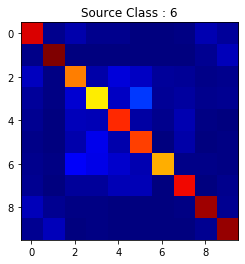

In [4]:
logdir = "results/NZ_CIFAR_6/logs/"
src_class = 6 # TARGET CLASS TO BE ATTACKED
ar, cm = find_results(logdir, src_class)